# Tutorial 02 - Cómo resolver un modelo a escala genómica y explorar los flujos de reacción que se generan

A partir de ahora, todos los ejempos se harán con el modelo iML1515 de E. coli.
Revisa el tutorial 01 para conocer los aspectos básicos de los modelos y su manipulación.

Este tutorial tiene como objetivo que conozcas la manera en que se resuelve un modelo a escala genómica y cómo trabajar con la solución, o sea, los flujos que se generan para cada reacción. 
  
Si deseas ver toda la documentación de COBRA, visita el sitio https://cobrapy.readthedocs.io/en/latest/

## Primero se cargan las librerías  y funciones que usaremos

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cobra
from cobra.flux_analysis import (single_gene_deletion,
                                 single_reaction_deletion,
                                 double_gene_deletion,
                                 double_reaction_deletion)

## Ahora cargamos el modelo

In [117]:
model = cobra.io.load_json_model('../Modelos/iML1515.json')

## Resolver el modelo significa optimizar la función objetivo

Recuerda que la función objetivo básicamente implica maximizar o minimizar una de las reacciones presentes en el modelo, como la de formación de biomasa (esta es la default)

In [118]:
print('La expresión de la función objetivo es\n\n', model.objective.expression, '\n')
print('La dirección de la optimización puede ser hacia minimizar o maximizar. Para esta reacción:',
      '\n\nmodel.objective.direction = ', model.objective.direction, '\n\n es decir, se maximizará')

La expresión de la función objetivo es

 1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685 

La dirección de la optimización puede ser hacia minimizar o maximizar. Para esta reacción: 

model.objective.direction =  max 

 es decir, se maximizará


## Resolviendo el modelo

Ahora vamos a resolver el modelo, es decir, generar los flujos de todas las reacciones a partir de la optimización de la función objetivo.

Esto se hace escribiendo el nombre del modelo y agregando .optimize()

In [119]:
model.optimize()

,fluxes,reduced_costs
CYTDK2,0.00000,-7.523353e-03
XPPT,0.00000,-1.504671e-02
HXPRT,0.00000,-1.504671e-02
NDPK5,0.00000,-0.000000e+00
SHK3Dr,0.33424,2.602085e-17
...,...,...
MPTS,0.00000,-2.257006e-02
MOCOS,0.00000,-3.469447e-18
BMOGDS2,0.00000,-3.338488e-01
FESD2s,0.00000,-6.938894e-18


Como puedes ver, al resolver (al optimizar) el modelo, se generan los flujos de cada reacción. Por ahora ignora la columna de "reduced_costs", la cual no es de importancia en este tutorial.  
  
Recuerda que puedes guardar la solución al modelo en una variable pero también puedes solo usar model.optimize()

In [120]:
solution = model.optimize()

Cuando resuelves el modelo, no todas las reacciones adquieren flujo. De hecho, muchas no tienen.  
  
Puedes determinar fácilmente cuáles reacciones tienen flujo diferente de 0 así:

In [121]:
print('En el modelo hay', len(model.reactions), 'reacciones')
print('De esas, hay', len(model.optimize().fluxes.loc[model.optimize().fluxes != 0]),
      'reacciones con flujo diferente de 0')
print('Las reacciones con flujo son:')
for reaction,flux in zip(model.optimize().fluxes.index,
                         model.optimize().fluxes):
    if flux != 0:
        print(reaction, flux)

En el modelo hay 2712 reacciones
De esas, hay 462 reacciones con flujo diferente de 0
Las reacciones con flujo son:
SHK3Dr 0.334240301365192
NDPK8 -0.022947509112696062
DHORTS -0.2901062935463692
OMPDC 0.2901062935463692
PYNP2r 0.022947509112696062
G5SD 0.1938646192351536
CS 6.913003110880896
ICDHyr 6.913003110880896
DURIPP -0.022947509112696062
PPA 3.0479134880278536
APRAUR 0.0003911407576342923
TRPAS2 -0.0498511526596722
DB4PS 0.0007822815152685846
ALAR 0.03655499789174491
RBFK 0.00019557037881707824
ALATA_L -0.8813874624823901
PPM -0.8185400881021329
ASPTA -2.5676926153352277
RBFSb 0.0003911407576342923
EX_pi_e -0.8459567750195798
SHCHD2 0.00019557037881721406
EX_co2_e 24.00329327297585
A5PISO 0.034125715607782214
PMDPHT 0.0003911407576342923
CPPPGO 0.00019557037881721406
GTHOr 0.21704102462081576
ILETA -0.2547931237102528
DHORD5 0.2901062935463692
IPPMIb -0.39511443201299673
ORPT -0.2901062935463692
RBFSa 0.0007822815152685846
ACHBS 0.2547931237102528
PFK_3 6.175949880064374
DHAD2 

Los flujos simulados anteriormente dependen tanto de la función objetivo como de la composición del medio de cultivo hipotético. Anteriormente vimos cómo conocer la función objetivo. Para saber la composición del medio debemos revisar ciertos parámetros predeterminados (o default) del modelo.

## Revisando los parámetros predeterminados del modelo

Ahora vamos a explorar los parámetros del modelo. Con esto básicamente nos referimos a aquellas reacciones de intercambio entre el medio y la célula (ambos hipotéticos) que tengan un flujo diferente de cero.  
Entre estas reacciones está la reacción de intercambio de una fuente de carbono predeterminada: glucosa

In [122]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

Al ejecutar el código anterior se muetran todas las reacciones que tienen un flujo de intercambio (entre el mdeio y la célula) diferente de cero.  
  
# Ten cuidado!  
  
Los flujos que se muestran corresponden al consumo de reactivos de cada reacción mostrada. Todas esas son reacciones de entrada HACIA la célula. En otras palabras, se muestra el lower bound de las reacciones. Por ejemplo, para glucosa:  

In [123]:
model.reactions.EX_glc__D_e

Reaction identifier,EX_glc__D_e
Name,D-Glucose exchange
Memory address,0x07f93ebc55400
Stoichiometry,glc__D_e <=> D-Glucose <=>
GPR,
Lower bound,-10.0
Upper bound,1000.0


Como puedes ver, el lower bound del intercambio de glucosa es de -10. Este valor se muestra como "10" en la celda anterior.  
  
## Para evitar confusiones

es mejor no utilizar la función model.medium excepto que sea estrictamente necesario.  
  
## Recuerda

que para que un ingrediente del medio de cultivo hipotético entre a la célula, debemos indicarlo en su reacción de entrada a la célula. Por ejemplo, veamos gráficamente el efecto de diferentes valores de la entrada de glucosa sobre la velocidad de crecimiento.

## Es importante que notes  
  
que para evitar modificar los parámetros del objeto "modelo", vamos a trabajar con este usando la función "with __ as \__"

/usr/local/lib/python3.6/dist-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


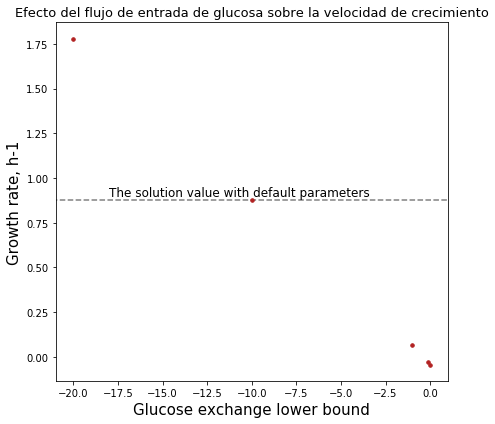

In [124]:
flujos_de_entrada = [-20, -10, -1, -0.1, 0] # Flujos de entrada de glucosa, o sea,
                                            # los lower bound de la reacción EX_glc__D_e

plt.figure(figsize = (7, 6)) # Generamos una figura con esas dimensiones

plt.title('Efecto del flujo de entrada de glucosa sobre la velocidad de crecimiento', fontsize = 13)

for flujo in flujos_de_entrada: # Hacemos un loop sobre cada flujo
    with model as test_model:   # En cada iteración, usaremos test_model como equivalente a nuestro objeto "model"
        test_model.reactions.get_by_id('EX_glc__D_e').lower_bound = flujo # Cambiamos el lower bound de EX_glc__D_e
        plt.plot(flujo, # El valor en el eje x
                 test_model.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'], # El valor en el eje y
                 marker = '.',
                 markersize = 7,
                 linestyle = 'none',
                 color = 'firebrick')
        plt.xlabel('Glucose exchange lower bound', fontsize = 15)
        plt.ylabel('Growth rate, h-1', fontsize = 15)

plt.xlim(-21, 1)
plt.hlines(model.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'], # colocamos una línea a la altura del valor 
          -23,                                                        # de la solución en el modelo default
          2,
          linestyle = 'dashed',
          color = 'gray')
plt.text(-18, 0.9, 'The solution value with default parameters', fontsize = 12)

plt.tight_layout()

Después de ejecutar la celda anterior, aparece un warning. Esto se debe a que con un valor de entrada de glucosa de 0, no hay fuentes de carbono que entren a la célula, por lo tanto, se genera un estado no-viable

## Cambiando la fuente de carbono y añadiendo aminoácidos al medio

Para cambiar de fuente de carbono, debemos quitar el flujo de entrada de glucosa y después darle flujo a la reacción de entrada de la fuente de carbono que hayamos seleccionado.  
  
En este ejemplo la fuente de carbono será succinato

In [125]:
model_succ = cobra.io.load_json_model('../Modelos/iML1515.json') # cargamos el modelo en una variable con otro nombre

In [126]:
model_succ.reactions.get_by_id('EX_glc__D_e') # Vemos que el flujo de entrada de glucosa está en -10

Reaction identifier,EX_glc__D_e
Name,D-Glucose exchange
Memory address,0x07f93ea372e80
Stoichiometry,glc__D_e <=> D-Glucose <=>
GPR,
Lower bound,-10.0
Upper bound,1000.0


In [127]:
model_succ.reactions.get_by_id('EX_glc__D_e').lower_bound = 0 # Ahora modificamos el lower bound

In [128]:
model_succ.reactions.get_by_id('EX_glc__D_e') # Ahora vemos que ese cambio ya se realizó en nuestro nuevo modelo

Reaction identifier,EX_glc__D_e
Name,D-Glucose exchange
Memory address,0x07f93ea372e80
Stoichiometry,glc__D_e --> D-Glucose -->
GPR,
Lower bound,0
Upper bound,1000.0


## Lo siguiente es buscar la reacción de "exchange" de succinato  
  
Para ello, dentro de las reacciones que contengan "EX" en su id, buscamos la(s) que contengan "succ" como parte del id de la reacción.

In [129]:
for reaction in model_succ.reactions:
    if 'EX_' in reaction.id:
        if 'succ' in reaction.id:
            print(reaction.name, reaction.id)

Succinate exchange EX_succ_e


En este caso solo hubo una reacción que cumpliera ambas condiciones: la EX_succ_e  
  
Podemos observar que el lower bound de esta reacción es 0

In [130]:
model_succ.reactions.EX_succ_e

Reaction identifier,EX_succ_e
Name,Succinate exchange
Memory address,0x07f93ea41de10
Stoichiometry,succ_e --> Succinate -->
GPR,
Lower bound,0.0
Upper bound,1000.0


Ahora hacemos que haya entrada de succinato a la célula

In [131]:
model_succ.reactions.EX_succ_e.lower_bound = -10

Y lo verificamos

In [132]:
model_succ.reactions.EX_succ_e

Reaction identifier,EX_succ_e
Name,Succinate exchange
Memory address,0x07f93ea41de10
Stoichiometry,succ_e <=> Succinate <=>
GPR,
Lower bound,-10
Upper bound,1000.0


## Ahora simulamos el modelo con una nueva fuente de carbono

In [133]:
model_succ.optimize()

,fluxes,reduced_costs
CYTDK2,0.000000,-7.784266e-03
XPPT,0.000000,-1.556853e-02
HXPRT,0.000000,-1.556853e-02
NDPK5,0.012160,0.000000e+00
SHK3Dr,0.171536,-3.491131e-17
...,...,...
MPTS,0.000000,-1.994932e-17
MOCOS,0.000000,1.344411e-17
BMOGDS2,0.000000,-3.434807e-01
FESD2s,0.000000,-1.301043e-17


El succinato es una fuente de carbono pore comparada con la glucosa, de tal modo que el crecimiento es más lento.  
  
Podemos comparar las velocidades de crecimiento en ambos modelos

In [134]:
print('La velocidad de crecimiento en glucosa es', model.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'])
print('La velocidad de crecimiento en succinato es', model_succ.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'])

La velocidad de crecimiento en glucosa es 0.8769972144269683
La velocidad de crecimiento en succinato es 0.45008625725638973


Una presentación más práctica de los resultados anteriores sería una donde tomemos menos decimales:

In [135]:
print('La velocidad de crecimiento en glucosa es',
      round(model.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'], 4))
print('La velocidad de crecimiento en succinato es',
      round(model_succ.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'], 4))

La velocidad de crecimiento en glucosa es 0.877
La velocidad de crecimiento en succinato es 0.4501


## Añadiendo aminoácidos al medio de cultivo  
  
Para simular un medio de cultivo rico, debemos buscar y agregar las reacciones de exchange de cada uno de los 20 aminoácidos. 
  
Por simplicidad, usaremos el mismo valor para el lower bound de la entrada de cada aminoácido

In [136]:
model_aa = cobra.io.load_json_model('../Modelos/iML1515.json') # cargamos un modelo al que le adicionaremos aa

Ahora simularemos el crecimiento de una célula con glucosa y los 20 aa en el medio

In [137]:
entrada_de_aminoacidos = -1 # Esta será el lower bound para todas las reacciones de entrada de aa

model_aa.reactions.EX_gly_e.lower_bound = entrada_de_aminoacidos    # Glicina
model_aa.reactions.EX_ala__L_e.lower_bound = entrada_de_aminoacidos # Alanina
model_aa.reactions.EX_arg__L_e.lower_bound = entrada_de_aminoacidos # Arginina
model_aa.reactions.EX_asn__L_e.lower_bound = entrada_de_aminoacidos # Asparagina
model_aa.reactions.EX_asp__L_e.lower_bound = entrada_de_aminoacidos # Aspartato
model_aa.reactions.EX_cys__L_e.lower_bound = entrada_de_aminoacidos # Cisteina
model_aa.reactions.EX_glu__L_e.lower_bound = entrada_de_aminoacidos # Glutamato
model_aa.reactions.EX_gln__L_e.lower_bound = entrada_de_aminoacidos # Glutamina
model_aa.reactions.EX_his__L_e.lower_bound = entrada_de_aminoacidos # Histidina
model_aa.reactions.EX_ile__L_e.lower_bound = entrada_de_aminoacidos # Isoleucina
model_aa.reactions.EX_leu__L_e.lower_bound = entrada_de_aminoacidos # Leucina
model_aa.reactions.EX_lys__L_e.lower_bound = entrada_de_aminoacidos # Lysina
model_aa.reactions.EX_met__L_e.lower_bound = entrada_de_aminoacidos # Metionina
model_aa.reactions.EX_phe__L_e.lower_bound = entrada_de_aminoacidos # Fenilalanina
model_aa.reactions.EX_pro__L_e.lower_bound = entrada_de_aminoacidos # Prolina
model_aa.reactions.EX_ser__L_e.lower_bound = entrada_de_aminoacidos # Serina
model_aa.reactions.EX_thr__L_e.lower_bound = entrada_de_aminoacidos # Treonina
model_aa.reactions.EX_trp__L_e.lower_bound = entrada_de_aminoacidos # Triptofano
model_aa.reactions.EX_tyr__L_e.lower_bound = entrada_de_aminoacidos # Tirosina
model_aa.reactions.EX_val__L_e.lower_bound = entrada_de_aminoacidos # Valina

model_aa.optimize()

,fluxes,reduced_costs
CYTDK2,0.000000,-1.054045e-02
XPPT,0.000000,3.469447e-18
HXPRT,0.000000,-1.054045e-02
NDPK5,0.000000,-0.000000e+00
SHK3Dr,0.001793,5.551115e-17
...,...,...
MPTS,0.000000,-3.162134e-02
MOCOS,0.000000,0.000000e+00
BMOGDS2,0.000000,-4.580703e-01
FESD2s,0.000000,-2.066056e-15


Experimentalmente, el crecimiento más rápido de E. coli (en medio con aa) es aproximadamente 2 h-1. La simulación anterior, con una entrada de aa de -1 y usando glucosa como fuente de, carbono da una solución bastante cercana a la realidad.

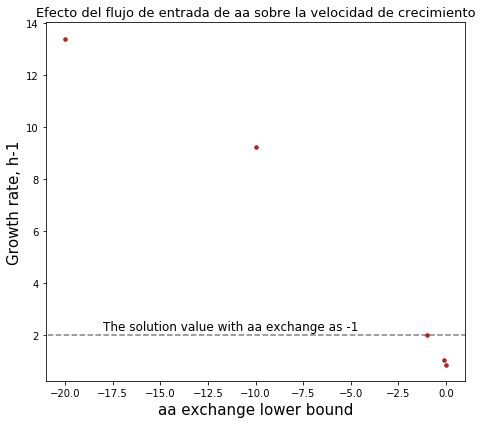

In [138]:
flujos_de_entrada = [-20, -10, -1, -0.1, 0] # flujos de entrada de aa

plt.figure(figsize = (7, 6))

plt.title('Efecto del flujo de entrada de aa sobre la velocidad de crecimiento', fontsize = 13)

for flujo in flujos_de_entrada:
    with model_aa as test_model:
        test_model.reactions.EX_gly_e.lower_bound = flujo
        test_model.reactions.EX_ala__L_e.lower_bound = flujo
        test_model.reactions.EX_arg__L_e.lower_bound = flujo
        test_model.reactions.EX_asn__L_e.lower_bound = flujo
        test_model.reactions.EX_asp__L_e.lower_bound = flujo
        test_model.reactions.EX_cys__L_e.lower_bound = flujo
        test_model.reactions.EX_glu__L_e.lower_bound = flujo
        test_model.reactions.EX_gln__L_e.lower_bound = flujo
        test_model.reactions.EX_his__L_e.lower_bound = flujo
        test_model.reactions.EX_ile__L_e.lower_bound = flujo
        test_model.reactions.EX_leu__L_e.lower_bound = flujo
        test_model.reactions.EX_lys__L_e.lower_bound = flujo
        test_model.reactions.EX_met__L_e.lower_bound = flujo
        test_model.reactions.EX_phe__L_e.lower_bound = flujo
        test_model.reactions.EX_pro__L_e.lower_bound = flujo
        test_model.reactions.EX_ser__L_e.lower_bound = flujo
        test_model.reactions.EX_thr__L_e.lower_bound = flujo
        test_model.reactions.EX_trp__L_e.lower_bound = flujo
        test_model.reactions.EX_tyr__L_e.lower_bound = flujo
        test_model.reactions.EX_val__L_e.lower_bound = flujo
        plt.plot(flujo,
                 test_model.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'],
                 marker = '.',
                 markersize = 7,
                 linestyle = 'none',
                 color = 'firebrick')
        plt.xlabel('aa exchange lower bound', fontsize = 15)
        plt.ylabel('Growth rate, h-1', fontsize = 15)
plt.xlim(-21, 1)
plt.hlines(model_aa.optimize().fluxes['BIOMASS_Ec_iML1515_core_75p37M'], # colocamos una línea a la altura del valor 
          -23,                                                        # de la solución en el modelo default
          2,
          linestyle = 'dashed',
          color = 'gray')
plt.text(-18, 2.2, 'The solution value with aa exchange as -1', fontsize = 12)

plt.tight_layout()

Como vemos, -1 es el mejor valor. Cualquier cantidad por encima de este, dará soluciones exageradas